<a href="https://colab.research.google.com/github/NamelessOgya/cafeobj-in-kagayaki/blob/master/LangChain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install langchain
!pip install openai
!pip install langchain-openai
!pip install langgraph
!pip install firecrawl-py

In [32]:
TEST = True

In [3]:
import os
from google.colab import userdata
#TODO: APIキーをsecretに登録してください。
os.environ["OPENAI_API_KEY"] = userdata.get("OPENAI_API_KEY")
os.environ["GOOGLE_CSE_ID"] = userdata.get("GOOGLE_CSE_ID")
os.environ["GOOGLE_API_KEY"] = userdata.get("GOOGLE_API_KEY")
os.environ["FIRE_CRAWL"] = userdata.get("FIRE_CRAWL")

In [4]:
# アイドルマスターのwikipedia

ref_urls = [
    "https://ja.wikipedia.org/wiki/THE_IDOLM@STER%E3%81%AE%E7%99%BB%E5%A0%B4%E4%BA%BA%E7%89%A9",
    "https://ja.wikipedia.org/wiki/%E3%82%A2%E3%82%A4%E3%83%89%E3%83%AB%E3%83%9E%E3%82%B9%E3%82%BF%E3%83%BC_%E3%83%9F%E3%83%AA%E3%82%AA%E3%83%B3%E3%83%A9%E3%82%A4%E3%83%96!%E3%81%AE%E7%99%BB%E5%A0%B4%E4%BA%BA%E7%89%A9",
    "https://ja.wikipedia.org/wiki/%E5%AD%A6%E5%9C%92%E3%82%A2%E3%82%A4%E3%83%89%E3%83%AB%E3%83%9E%E3%82%B9%E3%82%BF%E3%83%BC",
    "https://ja.wikipedia.org/wiki/%E3%82%A2%E3%82%A4%E3%83%89%E3%83%AB%E3%83%9E%E3%82%B9%E3%82%BF%E3%83%BC_%E3%82%B7%E3%83%A3%E3%82%A4%E3%83%8B%E3%83%BC%E3%82%AB%E3%83%A9%E3%83%BC%E3%82%BA"

]

# firecrawlによるスクレイピング

In [5]:
from firecrawl import FirecrawlApp
import re


app = FirecrawlApp(api_key=os.environ["FIRE_CRAWL"])

# 不要なURLを削除する関数
def clean_markdown(markdown):
    cleaned_markdown = re.sub(r'https?://\S+', '', markdown)  # URLを削除
    return cleaned_markdown

def get_markdown(url):
  # Scrape a website:
  res = app.scrape_url(url, params={'formats': ['markdown', 'html']})

  res["markdown"] = clean_markdown(res["markdown"])

  return res["markdown"]

In [6]:
mds = [get_markdown(i) for i in ref_urls]

In [8]:
print(len(mds))

4


In [9]:
print(mds[0])

[コンテンツにスキップ](

[地元の文物を撮影してウィキペディアに投稿すると、賞がもらえます!](

[![隠す]( "隠す")

出典: フリー百科事典『ウィキペディア（Wikipedia）』

[アイドルマスターシリーズ]( "アイドルマスターシリーズ") \> **THE IDOLM@STERの登場人物**

|     |     |
| --- | --- |
| [![曖昧さ回避]( "曖昧さ回避") | この項目では、 **ナムコ（後の [バンダイナムコゲームス→バンダイナムコエンターテインメント]( "バンダイナムコエンターテインメント")）のゲーム『 [THE IDOLM@STER]( "THE IDOLM@STER")』、およびゲームに準拠した関連作品に登場する人物** について説明しています。<br>- アニメ『アイドルマスター XENOGLOSSIA』の登場人物については「 [アイドルマスター XENOGLOSSIA#登場人物]( "アイドルマスター XENOGLOSSIA")」をご覧ください。<br>- 4コマ漫画『ぷちます! -PETIT IDOLM@STER-』の登場キャラクターおよび独自設定については「 [ぷちます! -PETIT IDOLM@STER-#登場キャラクター]( "ぷちます! -PETIT IDOLM@STER-")」をご覧ください。<br>- アイドルマスター シンデレラガールズで追加された登場人物については「 [アイドルマスター シンデレラガールズの登場人物]( "アイドルマスター シンデレラガールズの登場人物")」をご覧ください。<br>- アイドルマスター ミリオンライブ!で追加された登場人物については「 [アイドルマスター ミリオンライブ!の登場人物]( "アイドルマスター ミリオンライブ!の登場人物")」をご覧ください。<br>- アイドルマスター SideMで追加された登場人物については「 [アイドルマスター SideMの登場人物]( "アイドルマスター SideMの登場人物")」をご覧ください。<br>- ドラマ『THE IDOLM@STER.KR』の登場人物については「 [THE IDOLM@STER.KR#登場人物]( "THE IDOLM@STER.KR")」をご覧ください。<br>- アイドルマ

# LangChain: 事前データなしで推論してみる  
ちょこ先輩以外が推薦されます

In [10]:
# from langchain.agents import initialize_agent, load_tools
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model = "gpt-4o", api_key=os.environ["OPENAI_API_KEY"])
llm.invoke("アイドルマスターの中で、チョコレート好きのアイドルを紹介して")

AIMessage(content='「アイドルマスター」シリーズには多くのキャラクターが登場し、その中にはチョコレート好きのアイドルもいます。有名なキャラクターの一人としては、以下のアイドルが挙げられます。\n\n**双海亜美・真美（ふたみ あみ・まみ）**  \n双子の姉妹である亜美と真美は、元気いっぱいでいたずら好きなキャラクターです。彼女たちのエピソードやカードの中で、チョコレートをテーマにしたものが存在することがあります。どちらか一方が特にチョコレートが好きというわけではないですが、甘いものを好きそうなイメージがあります。\n\n他にもイベントや特定のストーリーの中で、チョコレートが絡むシーンが登場することがあります。アイドルによって好みや特技が設定されており、それに関連したストーリーが展開されることが多いですので、各作品やイベントをチェックすることで、新たな一面を知ることができるかもしれません。', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 263, 'prompt_tokens': 27, 'total_tokens': 290, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_eb9dce56a8', 'finish_reason': 'stop', 'logprobs': None}, id='run-0dbb774e-32a0-442c-8791-747c4a907b49-0', usage_metadata={'input_tokens': 27, 'output_tokens': 263, 'total_tokens': 2

# ベクトルデータベースを作成

In [14]:
# テキストを「チャンク」に切ります

from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size = 300,    # 各チャンクのサイズ
    chunk_overlap = 100   # チャンク間の重複部分のサイズ
)

# create_documentsメソッドを使用して、テキストを文書に分割
chank_list = []
for m in mds:
  docs = text_splitter.create_documents([m])
  chank_list += docs

chank_list = [c.page_content  for c in chank_list]

In [15]:
chank_list[3]

'[アイドルマスター XENOGLOSSIA#登場人物]( "アイドルマスター XENOGLOSSIA")」をご覧ください。<br>- 4コマ漫画『ぷちます! -PETIT IDOLM@STER-』の登場キャラクターおよび独自設定については「 [ぷちます! -PETIT IDOLM@STER-#登場キャラクター]( "ぷちます! -PETIT IDOLM@STER-")」をご覧ください。<br>- アイドルマスター シンデレラガールズで追加された登場人物については「 [アイドルマスター シンデレラガールズの登場人物]( "アイドルマスター'

In [18]:
# openAIEmbeddingsでembeddingを作成します。

from langchain_openai import OpenAIEmbeddings
from langchain_core.vectorstores import InMemoryVectorStore

embeddings = OpenAIEmbeddings(
    model="text-embedding-3-large",
    # With the `text-embedding-3` class
    # of models, you can specify the size
    # of the embeddings you want returned.
)


vectorstore = InMemoryVectorStore.from_texts(
    chank_list ,
    embedding=embeddings,
)

# Use the vectorstore as a retriever
retriever = vectorstore.as_retriever()

In [22]:
# こんな感じで検索できます。
res = vectorstore.similarity_search_with_score(query="チョコレート",k=10)

In [23]:
res[0]

(Document(id='54f72dc3-0d41-48c3-9a8c-4ecfc22c67ec', metadata={}, page_content='[チョコレート]( "チョコレート") を渡したりと、愛のアイドル活動には協力的である。一方でCD売り上げが愛より低いと弁当に彼女の嫌いな [梅干し]( "梅干し") を8個も入れるなど、大人気のない行動をとったりもする。バラエティに関しては含むところがあるらしく、「一度色物として見られたらまともなアイドルには二度と戻れない」と厳しい一言を愛に投げかけている。漫画『Nuue'),
 0.4066394464962264)

In [24]:
res[3]

(Document(id='dc0cddd9-c285-4a9e-9e41-cd9b0d8e42e5', metadata={}, page_content='智代子（そのだ ちよこ）声 \\- [白石晴香]( "白石晴香")[\\[17\\]]( / 体重：46kg / 年齢：17歳 / 3サイズ：85/56/82 / 血液型：A型 /利き手：右/ 誕生日：2月24日 / 星座：魚座 / 出身地：千葉県趣味はスイーツ店巡り、特技はたくさん食べられること。甘いものが大好きな、クラスに一人はいるごく普通の少女。名前にちなんでチョコアイドルを名乗る。チームイメージカラーはピンク。高校二年生。西城 樹里（さいじょう じゅり）声 \\- [永井真里子]( "永井真里子")[\\[17\\]]( / 体重：48kg / 年齢：17歳 / 3サイズ：75/58/78 /'),
 0.3058426299372361)

ちょこ先輩は3番目の表出。ベクトル検索の課題が浮き彫りとなりました（？）

# Lang GraphによるマルチエージェントAI作成  
LangGraphを用いてマルチエージェントを実装します。  
- ユーザー入力から検索ワードを考える。(extract_query)  
- ベクトル検索により検索を実行(retrieve)  
- 取得した情報が本当に役立つか考え、推薦に必要な情報のみ出力する。(consider)  
- 取得した情報を元に推薦を行う。(suisen)


In [26]:
from langchain import LLMChain
from langchain.prompts import PromptTemplate
from langchain.output_parsers import StructuredOutputParser, ResponseSchema

from typing import Annotated, Literal, List
from typing_extensions import TypedDict
from langchain_core.runnables import RunnableConfig
from langgraph.graph import StateGraph
from IPython.display import Image, display

import random

# todo: いらない奴は消そう！！！

In [27]:
# LangGraphはステートマシンである。State部分の型をpydanicで定義。実際には辞書で管理することになる。

class State(TypedDict):
    requirement: str # ユーザーの要求
    query: List[str] # DB検索する際のクエリ
    counter: int   # クエリの数。loopの数に影響
    retrieved:List[str] # クエリの検索結果
    knowledge:str # 検索結果から生成した、質問返答に役立つ情報
    output: str

In [29]:
# 汎用関数。LLMからの出力結果をjson形式でもらって、python内では辞書で持つ。
# 繰り返し使うので関数か

def get_output_with_schema(name, description, template, input_variables, input_values):
    # ここでスキーマを定義。
    response_schemas = [
        ResponseSchema(
            name=name,
            description=description
        )
    ]

    # スキーマを元に、「出力はJSON形式でお願いします」的なプロンプトを考えてくれる。
    output_parser = StructuredOutputParser.from_response_schemas(response_schemas)
    format_instructions = output_parser.get_format_instructions()

    prompt = PromptTemplate(
        template=template,
        input_variables=input_variables,
        # フォーマット指示をプロンプトへ差し込む
        partial_variables={"format_instructions": format_instructions}
    )

    chain = LLMChain(
        llm=llm,
        prompt=prompt
    )

    # requirement = "チョコレートが好きなアイドル"

    dic = {}
    for name, val in zip(input_variables, input_values):
      dic[name] = val

    raw_output = chain.run(dic)

    # 事前定義したスキーマを元に、json⇒辞書の変換を勝手にやってくれる。
    parsed_output = output_parser.parse(raw_output)

    return parsed_output



In [36]:
def extract_query(state: State, config: RunnableConfig):
    """
      ユーザーの要求からクエリを生成
    """

    # レスポンスの形を定義
    template = """
    あなたはアイドルマスターに詳しいオタクです。
    REQUIREMENTに沿ったアニメキャラを推薦するにあたり、
    REQUIREMENTから検索単語として最適なものを列挙してください。
    json形式でお願いします。最大3つまででお願いします。

    また検索に使用するデータベースはアイドルデータのみが入ったデータベースなので、
    アイドル系統の内容に絞り込むための「アイドル」などの単語は不要です。

    REQUIREMENT:
    {requirement}

    # 以下の指示を守って、出力してください
    {format_instructions}
    """
    parsed_output = get_output_with_schema(
        name = "search_words",
        description = "検索ワードのリスト。最大3つまで",
        template = template,
        input_variables = ["requirement"],
        input_values = [state["requirement"]]
    )

    return {
        "query": parsed_output["search_words"]
    }

In [38]:
def loop(state: State, config: RunnableConfig):
    """
      ループカウンタを管理
    """

    if "counter" not in state:
        state["counter"] = len(state["query"])  # 初回のカウンター初期化


    state["counter"] -= 1



    return state  # ループを続ける

In [39]:
def retrieve(state: State, config: RunnableConfig):
    """
      クエリからデータを取得し、state["retrieved"]に格納
    """
    target_query = state["query"][state["counter"]]

    # dbをたたくコード
    res = vectorstore.similarity_search(query=target_query,k=10)


    if "retrieved" not in state.keys():
      state["retrieved"] = [res]
    else:
      state["retrieved"].append(res)

    return {
        "retrieved": state["retrieved"]
    }

In [81]:
def consider(state: State, config: RunnableConfig):
    """
      retrieveされた内容から質問に答えるための情報を抽出する。
    """
    template = """
    あなたはアイドルマスターのオタクです。
    以下の[要求]を持つ人にアイドルを紹介することがミッションです。
    [要求]
    {requirement}

    以下のタスクを実行してください。
    以下のコンテクストが[要求]に沿った推薦に役に立つかを判断してください。

    役に立たない場合:
    "なし"と出力してください。

    役に立つ場合:
    コンテクストに沿って[要求]に沿ったアイドルの紹介文を出力にあたり、必要な情報をアイドルごとに一つの文章として、簡潔に記載してください。
    必ずアイドルの名前と特徴がわかるように記載してください。

    [コンテクスト]
    {retrieved}

    # 以下の指示を守って、出力してください
    {format_instructions}
    """

    parsed_output = get_output_with_schema(
        name = "Recommendation",
        description = "アイドルの情報文字列または「なし」文字列",
        template = template,
        input_variables = ["requirement", "retrieved"],
        input_values = [state["requirement"],  state["retrieved"]]
    )

    if "knowledge" not in state.keys():
      state["knowledge"] = [parsed_output["Recommendation"]]
    else:
      state["knowledge"].append(parsed_output["Recommendation"])

    return {
        "knowledge": state["knowledge"]
    }

In [82]:
def suisen(state: State, config: RunnableConfig):
    """
      知識を得て推薦を実行
    """

    # 知識をcontextとして集約

    knowledge = ""
    print(state["knowledge"])
    for k in state["knowledge"]:
      if k == "なし":
        pass
      else:
        knowledge += k


    template = """
    あなたはアイドルマスターのオタクです。
    以下の[要求]を持つ人にアイドルを紹介することがミッションです。
    [要求]
    {requirement}

    以下のタスクを実行してください。


    コンテクストに沿って[要求]に沿ったアイドルの紹介文を出力してください。
    複数人のアイドルについて紹介する場合でも、出力は一つのテキストとして出力してください。

    [コンテクスト]
    {knowledge}

    # 以下の指示を守って、出力してください
    {format_instructions}

    """

    parsed_output = get_output_with_schema(
        name = "recommendation",
        description = "アイドルの紹介文。必ず一つの要素として出力すること。",
        template = template,
        input_variables = ["requirement", "knowledge"],
        input_values = [state["requirement"], knowledge]
    )



    output = parsed_output["recommendation"]
    return {"output": output}


In [83]:
def routing(state: State, config: RunnableConfig) -> Literal["loop", "suisen"]:
  print(f"cnt = {state['counter']}")

  if state["counter"] > 0:
    # カウンターが正なら戻る
    return "loop"

  else:
    # カウンターが負けなら次へ
    return "suisen"

In [84]:
# ノードを定義していく
graph_builder = StateGraph(State)
graph_builder.add_node("extract_query", extract_query)
graph_builder.add_node("loop", loop)
graph_builder.add_node("retrieve", retrieve)
graph_builder.add_node("consider", consider)
graph_builder.add_node("suisen", suisen)
graph_builder.add_node("end_node", lambda state: {"output": state["output"]})

graph_builder.set_entry_point("extract_query")



In [85]:
# エッジを設置。遷移図を定義

graph_builder.add_edge("extract_query", "loop")
graph_builder.add_edge("loop", "retrieve")
graph_builder.add_edge("retrieve", "consider")

# 条件付き分岐を実装
graph_builder.add_conditional_edges(
    "consider",# 遷移元
    routing,
    # 条件を満たさないならloopへもどる、そうでないならsuisenへ
)



graph_builder.set_finish_point("suisen")

In [73]:
# Graphをコンパイル
graph = graph_builder.compile()
# Graphの実行(引数にはStateの初期値を渡す)
state = graph.invoke(
    {
        "requirement": "チョコレートが好きなアイドル"
    }
)

cnt = 2
cnt = 1
cnt = 0
['なし', 'なし', '智代子（そのだ ちよこ）は甘いものが大好きで、特に名前にちなんでチョコアイドルを名乗っています。彼女の趣味はスイーツ店巡りです。']


In [74]:
state["output"]

'アイドルマスターシリーズの中でチョコレートが好きなアイドルとしておすすめなのは、智代子（そのだ ちよこ）です。智代子は特に甘いもの、特にチョコレートが大好きで、自らをチョコアイドルと呼んでいます。彼女のスイーツ店巡りという趣味は、その情熱を証明しています。智代子の魅力は、チョコレートに対する愛情と情熱を活動に反映させるその姿勢です。彼女の可愛らしく、そして熱いチョコレートへの思いは、ファンを惹きつけてやみません。甘いひと時を共有したい方にぴったりのアイドルです。'

こんな感じでデバッグモードにすると各ノードでの出力を見ることができる。

In [75]:
state = graph.invoke({"requirement": "チョコレートが好きなアイドル", "retrieved": []}, debug=True)

[-1:checkpoint] State at the end of step -1:
{}
[0:tasks] Starting 1 task for step 0:
- __start__ -> {'requirement': 'チョコレートが好きなアイドル', 'retrieved': []}
[0:writes] Finished step 0 with writes to 2 channels:
- requirement -> 'チョコレートが好きなアイドル'
- retrieved -> []
[0:checkpoint] State at the end of step 0:
{'requirement': 'チョコレートが好きなアイドル', 'retrieved': []}
[1:tasks] Starting 1 task for step 1:
- extract_query -> {'requirement': 'チョコレートが好きなアイドル', 'retrieved': []}
[1:writes] Finished step 1 with writes to 1 channel:
- query -> ['チョコレート', 'スイーツ', '甘いもの']
[1:checkpoint] State at the end of step 1:
{'query': ['チョコレート', 'スイーツ', '甘いもの'],
 'requirement': 'チョコレートが好きなアイドル',
 'retrieved': []}
[2:tasks] Starting 1 task for step 2:
- loop -> {'query': ['チョコレート', 'スイーツ', '甘いもの'],
 'requirement': 'チョコレートが好きなアイドル',
 'retrieved': []}
[2:writes] Finished step 2 with writes to 4 channels:
- requirement -> 'チョコレートが好きなアイドル'
- query -> ['チョコレート', 'スイーツ', '甘いもの']
- retrieved -> []
- counter -> 2
[2:checkpoint] Stat

In [519]:
mermaid_code = graph.get_graph().draw_mermaid()
print(mermaid_code)  # 出力を確認

%%{init: {'flowchart': {'curve': 'linear'}}}%%
graph TD;
	__start__(<p>__start__</p>)
	extract_query(extract_query)
	loop(loop)
	retrieve(retrieve)
	consider(consider)
	suisen(suisen)
	end_node(end_node)
	__end__(<p>__end__</p>)
	__start__ --> extract_query;
	extract_query --> loop;
	loop --> retrieve;
	retrieve --> consider;
	suisen --> __end__;
	consider -.-> loop;
	consider -.-> suisen;
	classDef default fill:#f2f0ff,line-height:1.2
	classDef first fill-opacity:0
	classDef last fill:#bfb6fc



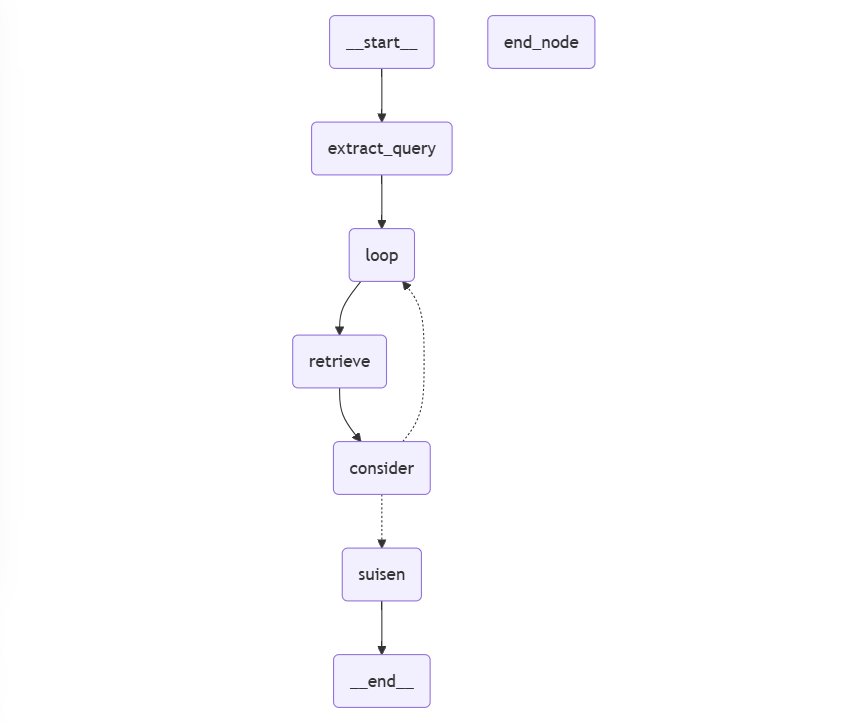